#Besoin _client 3

In [12]:
import pandas as pd
import numpy as np

In [13]:
# Lire les données
df = pd.read_csv('./Data_Arbre.csv')
df['fk_arb_etat'].unique()

array(['EN PLACE', 'REMPLACÉ', 'Essouché', 'SUPPRIMÉ', 'ABATTU',
       'Non essouché'], dtype=object)

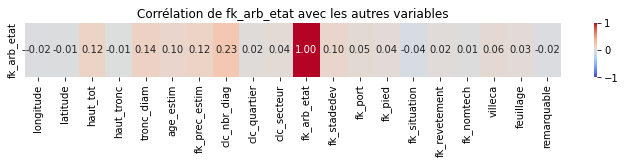

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sélectionner les variables quantitatives
quantitative_vars = df.select_dtypes(include=['float64', 'int64'])

# Sélectionner et encoder les variables qualitatives
qualitative_vars = df.select_dtypes(include=['object', 'category']).apply(LabelEncoder().fit_transform)

# Combiner les variables quantitatives et qualitatives encodées
combined_vars = pd.concat([quantitative_vars, qualitative_vars], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = combined_vars.corr()

# Afficher uniquement la ligne de 'fk_arb_etat'
plt.figure(figsize=(12, 1))
sns.heatmap(correlation_matrix.loc[['fk_arb_etat']], annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Corrélation de fk_arb_etat avec les autres variables')
plt.show()

tout au dessus 0.1

In [15]:
# Fonction pour filtrer les variables avec corrélation
def filter_highly_correlated(corr_matrix, target_var, threshold):
    # Sélectionner les variables avec une corrélation absolue supérieure au seuil
    high_corr_vars = corr_matrix[target_var][abs(corr_matrix[target_var]) > threshold].index
    return high_corr_vars

In [16]:
# Sélectionner les colonnes pertinentes
high_corr_vars = filter_highly_correlated(correlation_matrix, 'fk_arb_etat', 0.09) # 0.09 pour prendre en compte les erreurs d'arrondi dans l'affichage de la matrice
print(high_corr_vars)

data = df[high_corr_vars].copy()
print(data.head())

Index(['haut_tot', 'tronc_diam', 'age_estim', 'fk_prec_estim', 'clc_nbr_diag',
       'fk_arb_etat', 'fk_stadedev'],
      dtype='object')
   haut_tot  tronc_diam  age_estim  fk_prec_estim  clc_nbr_diag fk_arb_etat  \
0       6.0        37.0       15.0            5.0           0.0    EN PLACE   
1      13.0       160.0       50.0           10.0           0.0    EN PLACE   
2      12.0       116.0       30.0           10.0           0.0    REMPLACÉ   
3      16.0       150.0       50.0            2.0           0.0    EN PLACE   
4       5.0       170.0       40.0            2.0           0.0    Essouché   

  fk_stadedev  
0       Jeune  
1      Adulte  
2      Adulte  
3      Adulte  
4      Adulte  


In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encodage des colonnes catégorielles
label_encoders = {}
for column in ['fk_prec_estim', 'fk_stadedev', 'fk_arb_etat']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('fk_arb_etat', axis=1)
y = data['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#Entrainer le modèle de classification

# Initialiser et entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9041835357624831


In [19]:
import joblib
#Charger le modèle

# Enregistrer le modèle
joblib.dump(model, 'random_forest_model.pkl')

# Enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')

# Enregistrer les label encoders
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import os

# Filtrer les données pour inclure seulement 'essouché' ou 'non essouché'
filtered_df = df[df['fk_arb_etat'].isin(['Essouché', 'Non essouché'])].copy()

# Enregistrer les données filtrées dans un nouveau fichier CSV
filtered_df.to_csv('./Filtered_Data_Arbre.csv', index=False)
print("Le fichier CSV filtré a été créé avec succès.")

# Lire les données filtrées
df2 = pd.read_csv('./Filtered_Data_Arbre.csv')

# Sélectionner les colonnes pertinentes
data2 = df2[high_corr_vars].copy()

Le fichier CSV filtré a été créé avec succès.


In [21]:
# Encodage des colonnes catégorielles
categorical_columns = ['fk_prec_estim', 'fk_stadedev']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le

# Encodage de la colonne cible 'fk_arb_etat'
le_arb_etat = LabelEncoder()
data2['fk_arb_etat'] = le_arb_etat.fit_transform(data2['fk_arb_etat'])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data2.drop('fk_arb_etat', axis=1)
y = data2['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
scores_grid = np.zeros(shape=(3,3))

In [22]:
def getModelMetrics(model, X_train, X_test, y_train, y_test, name, isGridSearch=False):
    # Entraîner le modèle
    model.fit(X_train, y_train.ravel())

    if isGridSearch:
        # Afficher les meilleurs paramètres et le meilleur score
        print(f'Best parameters for {name}:', model.best_params_)
        print(f'Best score for {name}:', model.best_score_)

        # Évaluation pour le meilleur modèle RandomForestRegressor
        model = model.best_estimator_
        filename = name.replace(' ', '_')
        joblib.dump(model, f'best_{filename}.pkl')

    # Prédictions sur les données de test
    y_pred_best_rf_scaled = model.predict(X_test)

    # Calcul des métriques de régression
    mse = mean_squared_error(y_test, y_pred_best_rf_scaled)
    mae = mean_absolute_error(y_test, y_pred_best_rf_scaled)
    r2 = r2_score(y_test, y_pred_best_rf_scaled)

    return [mse, mae, r2]

def showMetrics(metrics):
    print(f'MSE: {metrics[0]}')
    print(f'MAE: {metrics[1]}')
    print(f'R²: {metrics[2]}')

In [24]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres pour GridSearchCV
param_grid = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 15, 25],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

scores_grid[0] = getModelMetrics(grid_search, X_train, X_test, y_train, y_test, 'Random Forest Regressor', True)
showMetrics(scores_grid[0])

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Random Forest Regressor: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}
Best score for Random Forest Regressor: -0.036437892237630054
MSE: 0.11497547176809064
MAE: 0.20608331874809097
R²: -0.028692309172152042


In [25]:
# Enregistrer les label encoders pour les colonnes catégorielles
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

print("Modèle et transformateurs enregistrés avec succès.")

# Ajouter la colonne "déraciner" à un nouveau fichier CSV si celui-ci n'existe pas déjà
output_file = './Data_Arbre_Modified.csv'
if os.path.exists(output_file):
    print(f"Le fichier {output_file} existe déjà. Aucune action n'a été effectuée.")
else:
    # Lire les données
    newDataArbre = pd.read_csv('./Data_Arbre.csv')
    # Ajouter la colonne "déraciner" initialisée à 0
    newDataArbre['déraciner'] = 0

    # Enregistrer les données modifiées dans un nouveau fichier CSV
    newDataArbre.to_csv(output_file, index=False)
    print("Le fichier CSV modifié a été créé avec succès.")

Modèle et transformateurs enregistrés avec succès.
Le fichier ./Data_Arbre_Modified.csv existe déjà. Aucune action n'a été effectuée.


In [26]:
# Charger le modèle et les transformateurs
loaded_model = joblib.load('best_Random_Forest_Regressor.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)

# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)

[0.09178622 0.05216939 0.04943129 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00333333 0.00333333
 0.00333333 0.00333333 0.00561905 0.11475554 0.04865935 0.
 0.00228571 0.00228571 0.00255666 0.01145626 0.0261957  0.00495726
 0.00724298 0.01024178 0.07947294 0.00630647 0.00630647 0.00630647
 0.00804945 0.01661499 0.00630647 0.00630647 0.00630647 0.05597428
 0.0086053  0.14380303 0.17311977 0.01052023 0.21393072 0.03915447
 0.11971054 0.21150492 0.13436471 0.11163731 0.04787854 0.0736502
 0.08814228 0.02175215 0.32505112 0.14655135 0.1262513  0.1262513
 0.1574947  0.12936242 0.19399719 0.101305   0.22287076 0.22287076
 0.00825479 0.00825479 0.00428532 0.0129712  0.31642231 0.02449134
 0.04943841 0.18588951 0.17623542 0.19997531 0.36253319 0.38784141
 0.07470067 0.29987809 0.01282487 0.11667457 0.16309957 0.02516167
 0.12760898 0.11251394 0.12308566 0.21190544 0.27033012 0.26047067
 0.17441884 0.1650306

In [27]:
# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Le fichier CSV modifié avec les prédictions a été créé avec succès.
Liste des arbres déracinés:
Empty DataFrame
Columns: [longitude, latitude, clc_quartier, clc_secteur, haut_tot, haut_tronc, tronc_diam, fk_arb_etat, fk_stadedev, fk_port, fk_pied, fk_situation, fk_revetement, age_estim, fk_prec_estim, clc_nbr_diag, fk_nomtech, villeca, feuillage, remarquable, déraciner]
Index: []

[0 rows x 21 columns]
Nombre total d'arbres déracinés : 0


### En utilisant Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 150, 250],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}
model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

scores_grid[1] = getModelMetrics(grid_search, X_train, X_test, y_train, y_test, 'Boosting', True)
showMetrics(scores_grid[1])

# Charger le modèle et les transformateurs
loaded_model = joblib.load('best_Boosting.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)

# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)

# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 0.9}
Best score for Boosting: -0.06424880675941698
MSE: 0.1129153043294414
MAE: 0.1985088159688028
R²: -0.010259869912237374
[ 3.35813175e-01  1.48719267e-01  1.43148813e-01  5.30505689e-03
  4.88928116e-03  5.30505689e-03  3.74343865e-03  5.30505689e-03
  4.88928116e-03  5.30505689e-03  4.88928116e-03  5.30505689e-03
  5.30505689e-03  5.30505689e-03  5.30505689e-03  5.30505689e-03
  3.46722643e-03  3.46722643e-03  3.46722643e-03  3.46722643e-03
  3.01072569e-03  5.51289926e-01  1.20478203e-01  4.95504205e-03
  4.67339296e-03  4.67339296e-03  4.83719455e-02  1.19022595e-02
  5.66235038e-03  4.89039888e-03  4.89039888e-03  2.02895899e-06
  4.11542799e-01  1.84751539e-01  1.84751539e-01  1.84751539e-01
  2.04358891e-01  2.03338386e-01  1.84751539e-01  1.84751539e-01
  1.84751539e-01  1.43864301e-02  4

# Bagging

In [30]:
from sklearn.ensemble import BaggingRegressor

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
model = BaggingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

scores_grid[2] = getModelMetrics(grid_search, X_train, X_test, y_train, y_test, 'Bagging', True)
showMetrics(scores_grid[2])

# Charger le modèle et les transformateurs
loaded_model = joblib.load('best_Bagging.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)

# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)

# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Bagging: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Best score for Bagging: 0.009136288705768414
MSE: 0.10303779855819865
MAE: 0.18915941010419454
R²: 0.07811475525282274
[0.21550173 0.05274813 0.10898551 0.00065217 0.00065217 0.00065217
 0.00065217 0.00065217 0.00065217 0.00065217 0.00065217 0.00065217
 0.00065217 0.00065217 0.00065217 0.00065217 0.002      0.002
 0.002      0.002      0.002      0.22176329 0.01842995 0.00065217
 0.00065217 0.00065217 0.12731884 0.02101278 0.05922707 0.00842995
 0.00842995 0.00842995 0.08403709 0.12215217 0.12215217 0.12215217
 0.13007892 0.21257892 0.12215217 0.12215217 0.12215217 0.10556123
 0.00793583 0.19409298 0.26284298 0.01089197 0.23492631 0.09460885
 0.09208107 0.20242631 0.1205937  0.17296743 0.07049139 0.05976036
 0.13794218 0.07572155 0.35463266 0.05635864 0.10467761 0.10467761
 0.1373919  0.

### Comparaison de valeur

In [31]:
# Création des données
compa = {
    'Modele': ['Random Forest', 'Boosting', 'Bagging'],
    'MSE': scores_grid[:,0],
    'MAE': scores_grid[:,1],
    'R2': scores_grid[:,2]
}

# Création du DataFrame
tab = pd.DataFrame(compa)

# Affichage du DataFrame
tab

Modele       MSE       MAE        R2
0  Random Forest  0.114975  0.206083 -0.028692
1       Boosting  0.112915  0.198509 -0.010260
2        Bagging  0.103038  0.189159  0.078115

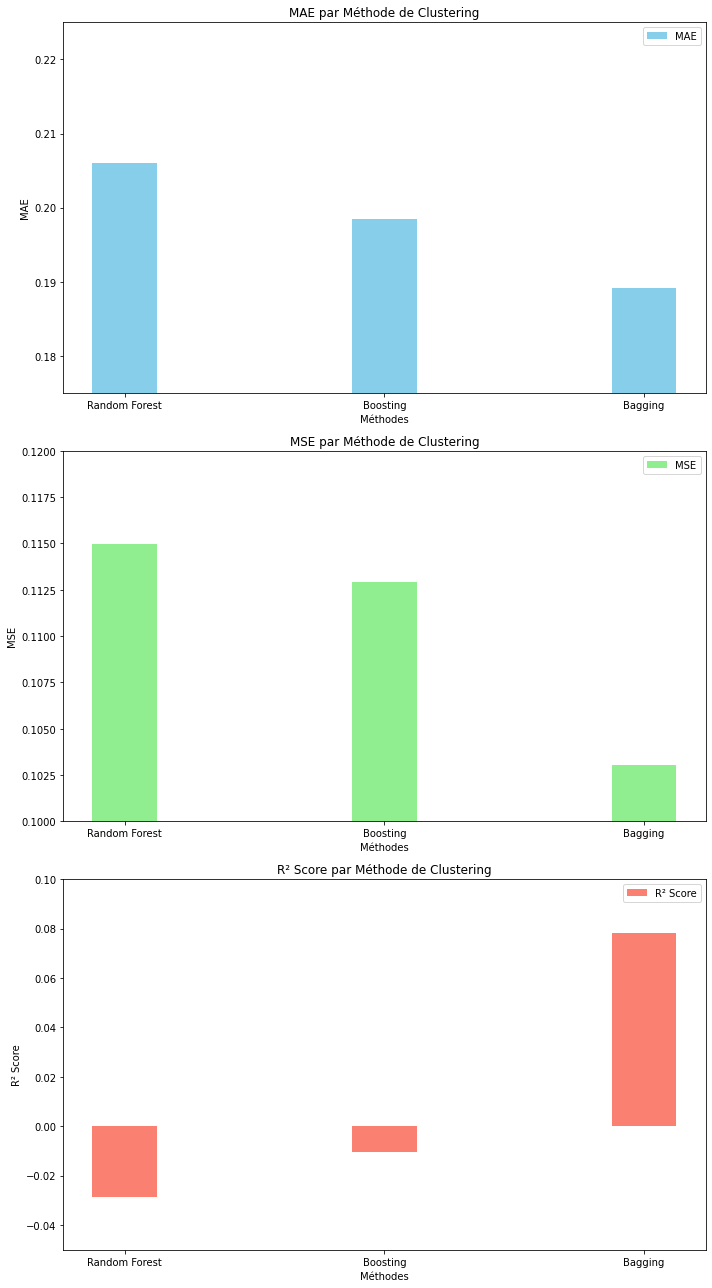

In [35]:
import matplotlib.pyplot as plt

# Définir la position des barres
x = np.arange(len(compa["Modele"]))

# Largeur des barres
width = 0.25

# Créer une figure avec trois sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Premier graphique pour F1 Score
axs[0].bar(x, compa["MAE"], width, label='MAE', color='skyblue')
axs[0].set_xlabel('Méthodes')
axs[0].set_ylabel('MAE')
axs[0].set_ylim([0.175, 0.225])
axs[0].set_title('MAE par Méthode de Clustering')
axs[0].set_xticks(x)
axs[0].set_xticklabels(compa["Modele"])
axs[0].legend()

# Deuxième graphique pour RMSE
axs[1].bar(x, compa["MSE"], width, label='MSE', color='lightgreen')
axs[1].set_xlabel('Méthodes')
axs[1].set_ylabel('MSE')
axs[1].set_ylim([0.10, 0.12])
axs[1].set_title('MSE par Méthode de Clustering')
axs[1].set_xticks(x)
axs[1].set_xticklabels(compa["Modele"])
axs[1].legend()

# Troisième graphique pour R² Score
axs[2].bar(x, compa["R2"], width, label='R² Score', color='salmon')
axs[2].set_xlabel('Méthodes')
axs[2].set_ylabel('R² Score')
axs[2].set_ylim([-0.05, 0.10])
axs[2].set_title('R² Score par Méthode de Clustering')
axs[2].set_xticks(x)
axs[2].set_xticklabels(compa["Modele"])
axs[2].legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()
